In [7]:
#hierarchical clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [39]:
df = pd.read_csv('abalone.csv')

In [73]:
df = df.dropna()

In [41]:
df_ds=pd.get_dummies(df)
df_ds.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


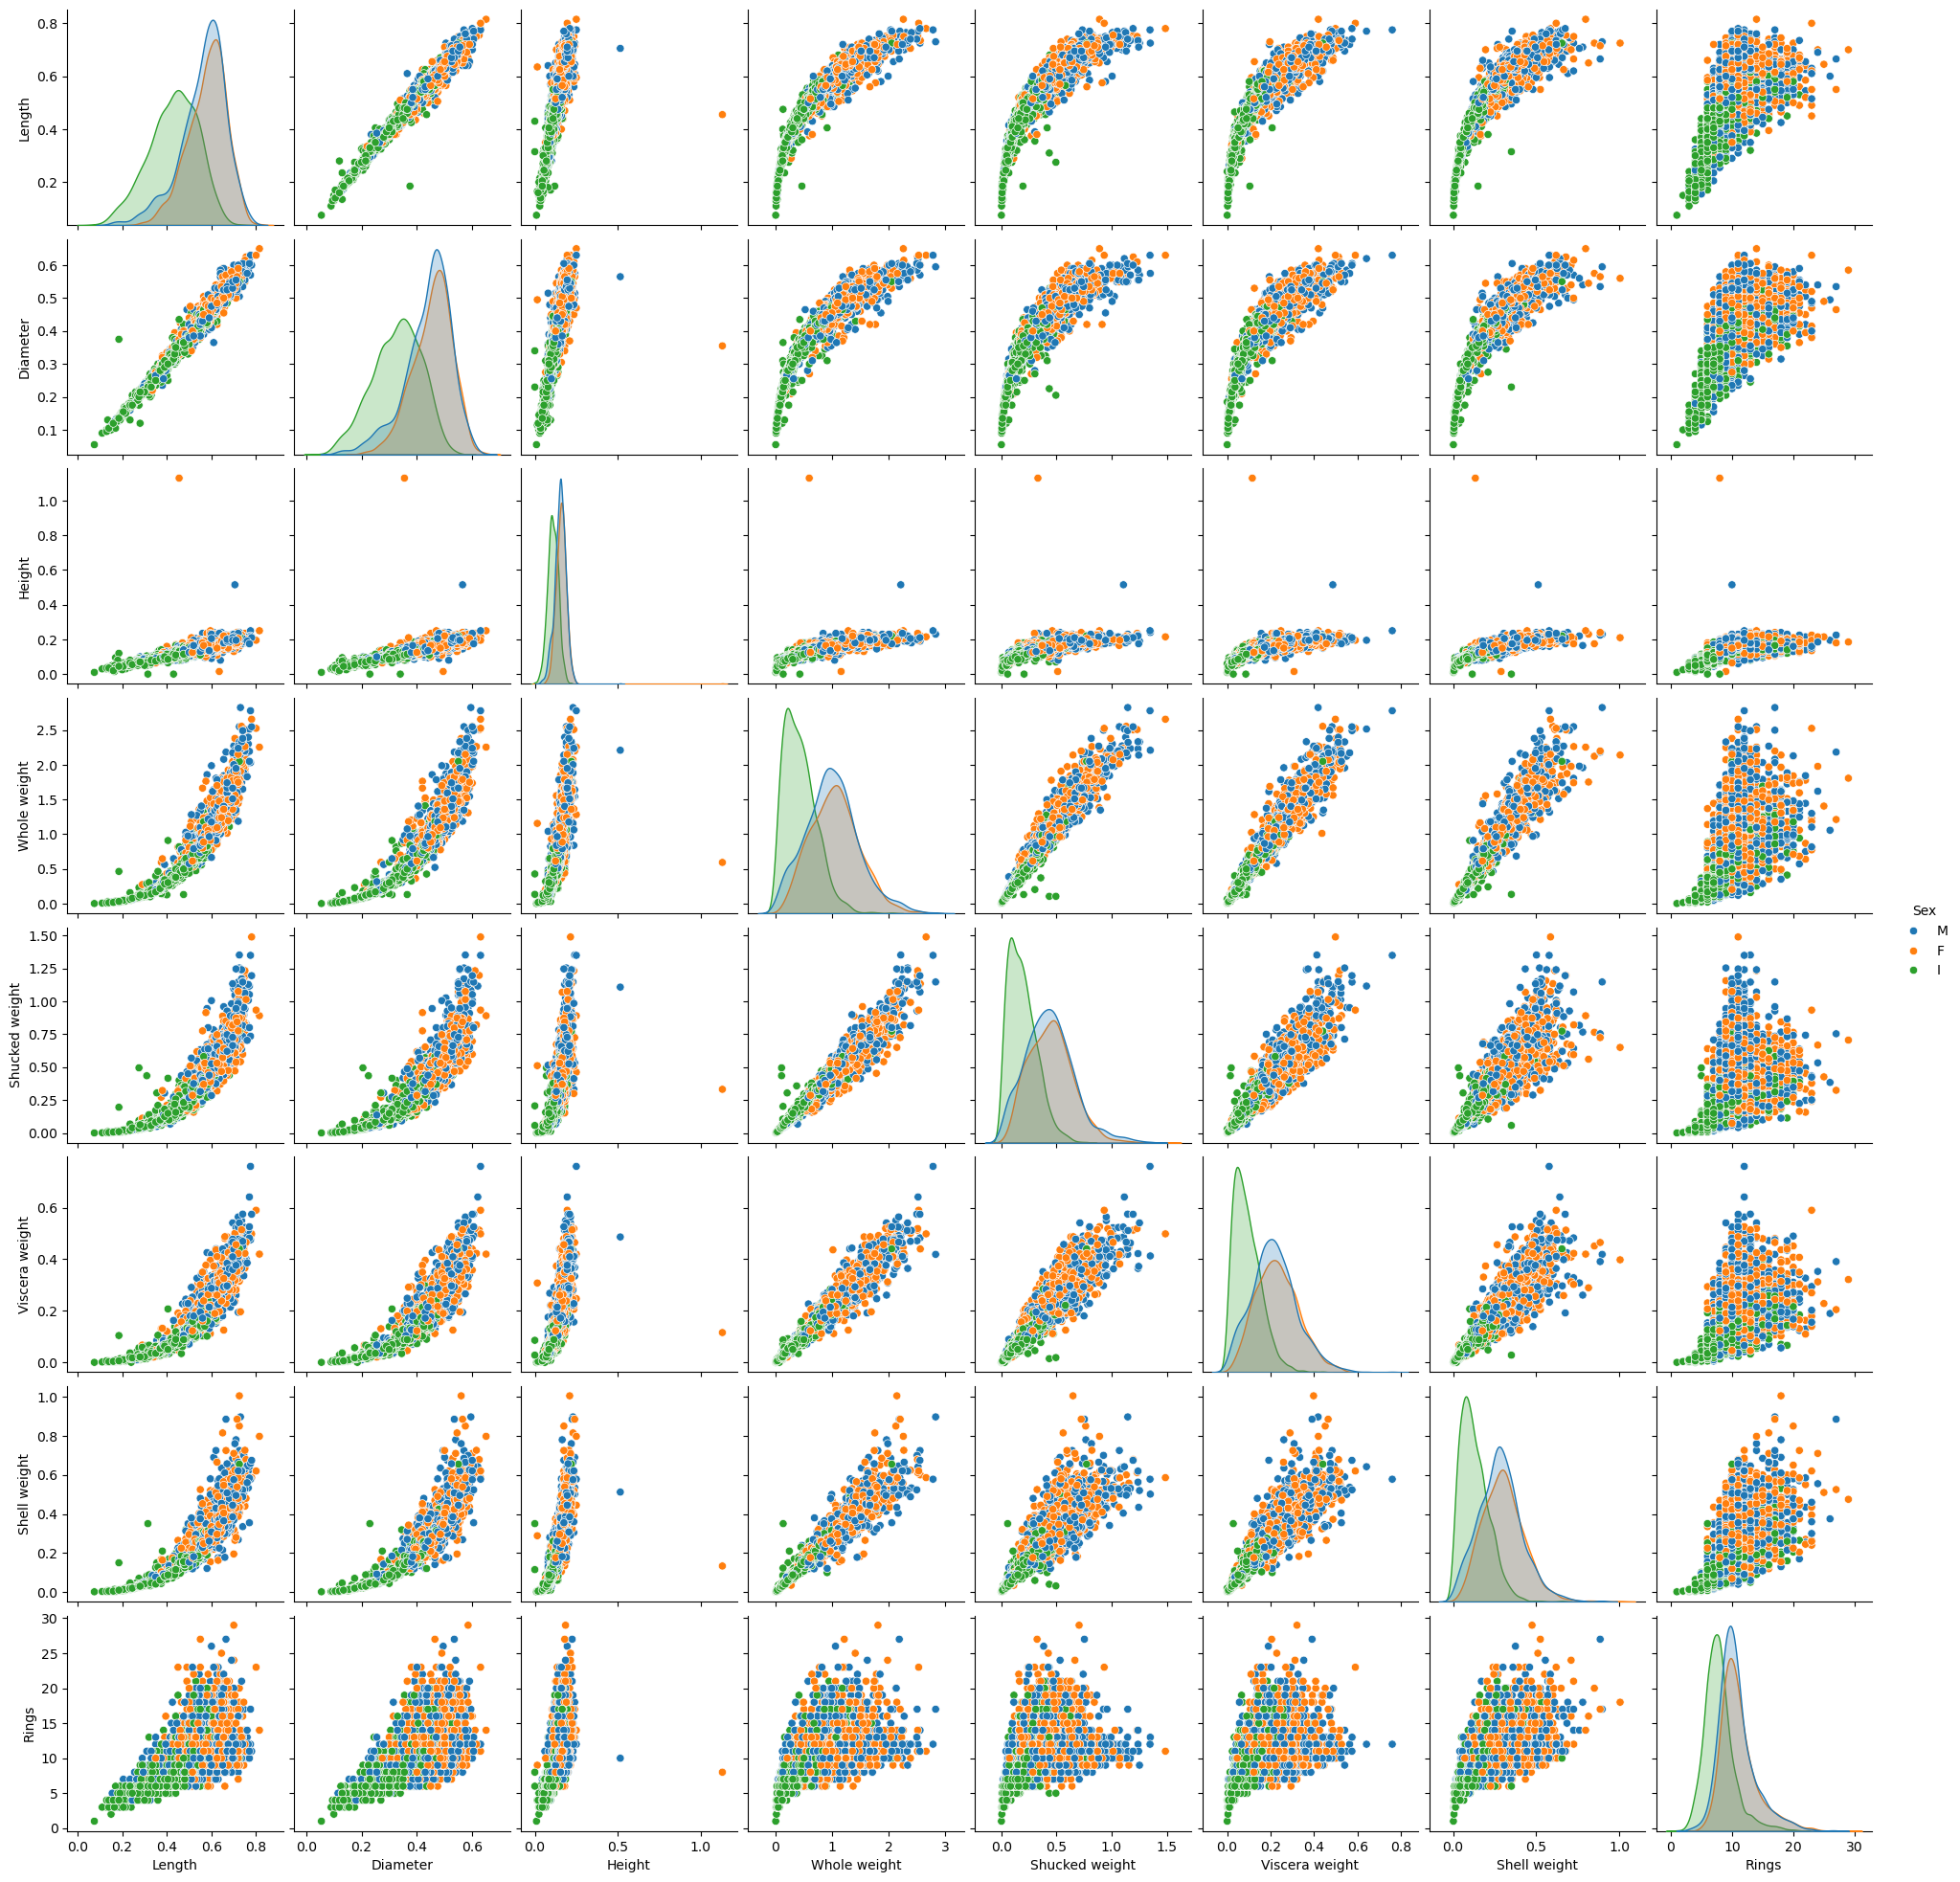

In [77]:
sns.pairplot(df,hue='Sex')

In [44]:
scaler = MinMaxScaler()

In [130]:
scaled_df = scaler.fit_transform(df_ds)

In [141]:
scaled_df = pd.DataFrame(scaled_df, columns=df_ds.columns, index=df_ds.index)

In [103]:
model = AgglomerativeClustering(n_clusters=3)

In [107]:
linkage_matrix = hierarchy.linkage(model.children_)

In [105]:
cluster_labels = model.fit_predict(scaled_df)

<Axes: xlabel='Length', ylabel='Whole weight'>

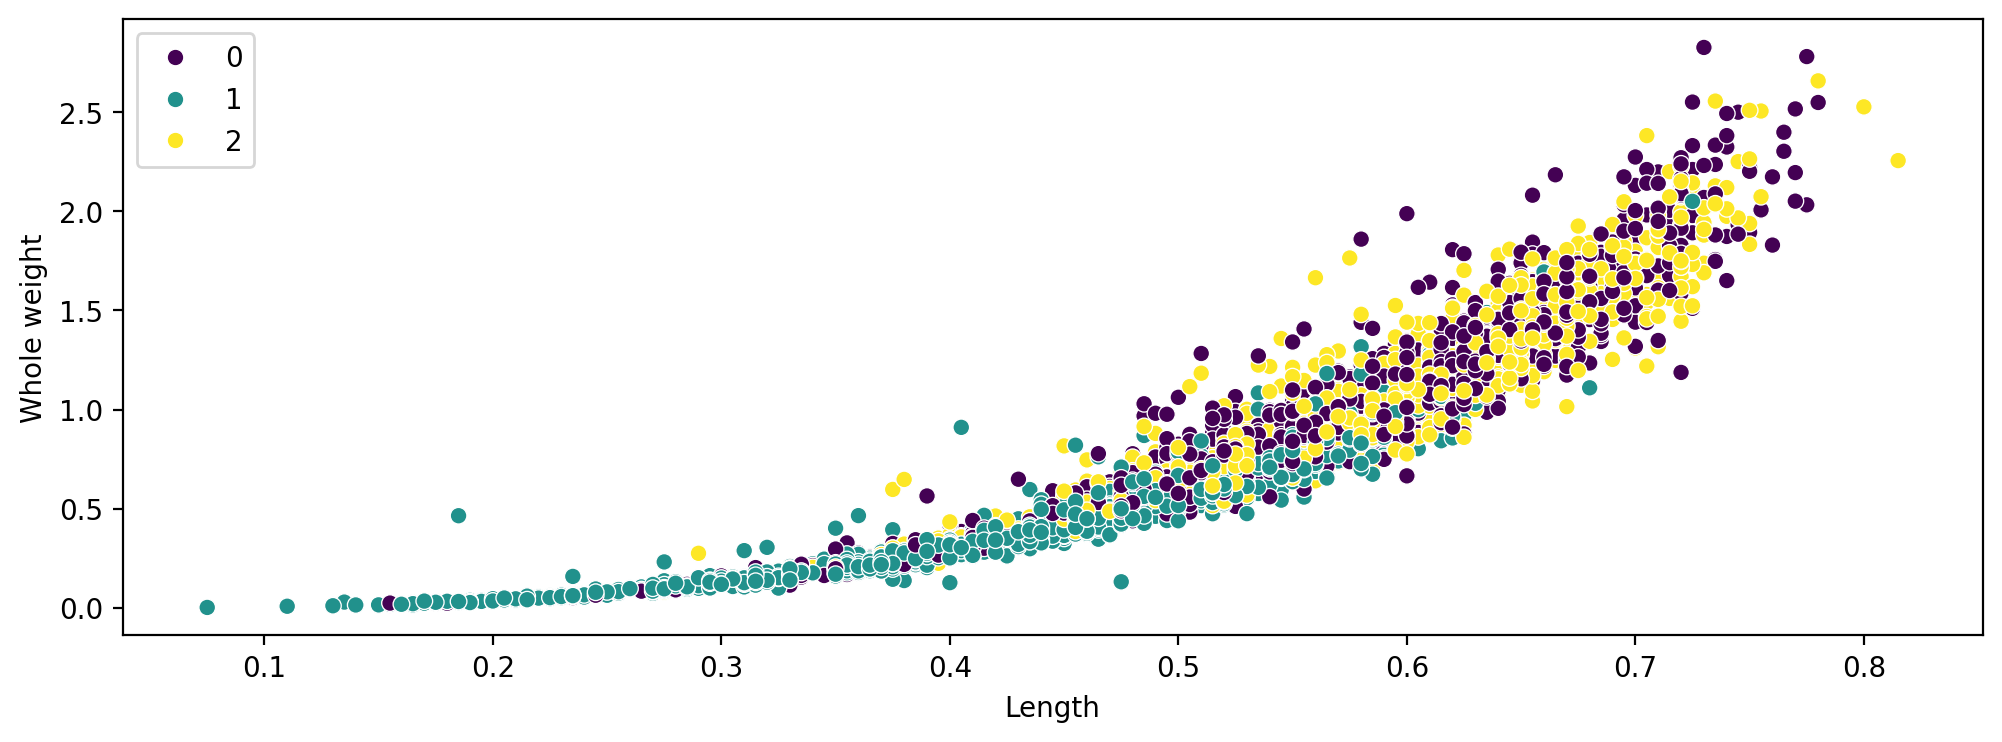

In [109]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='Length',y='Whole weight',palette='viridis',hue=cluster_labels)

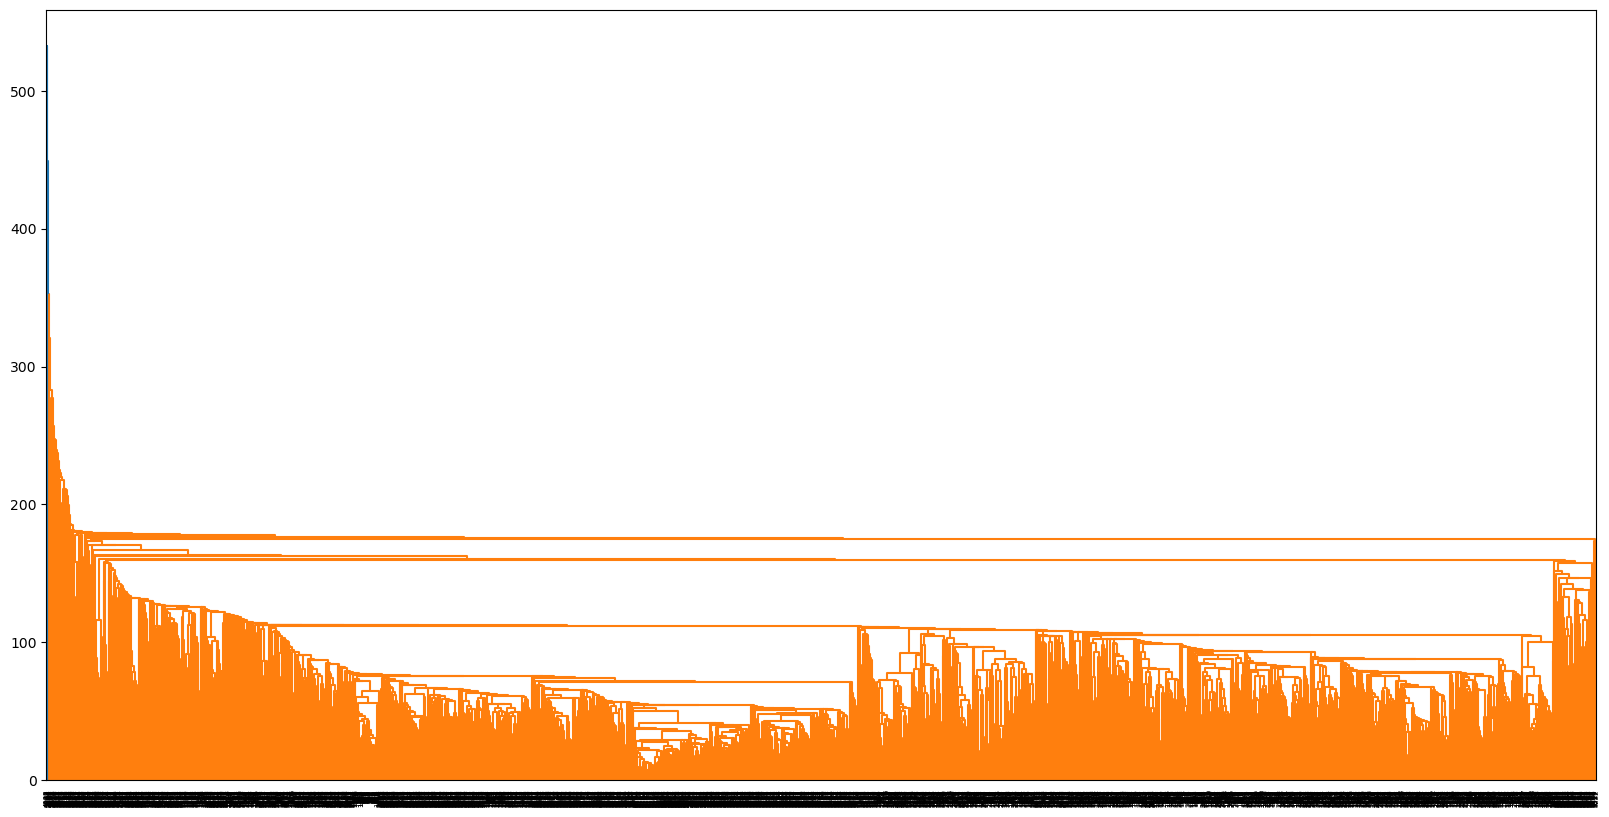

In [112]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix)

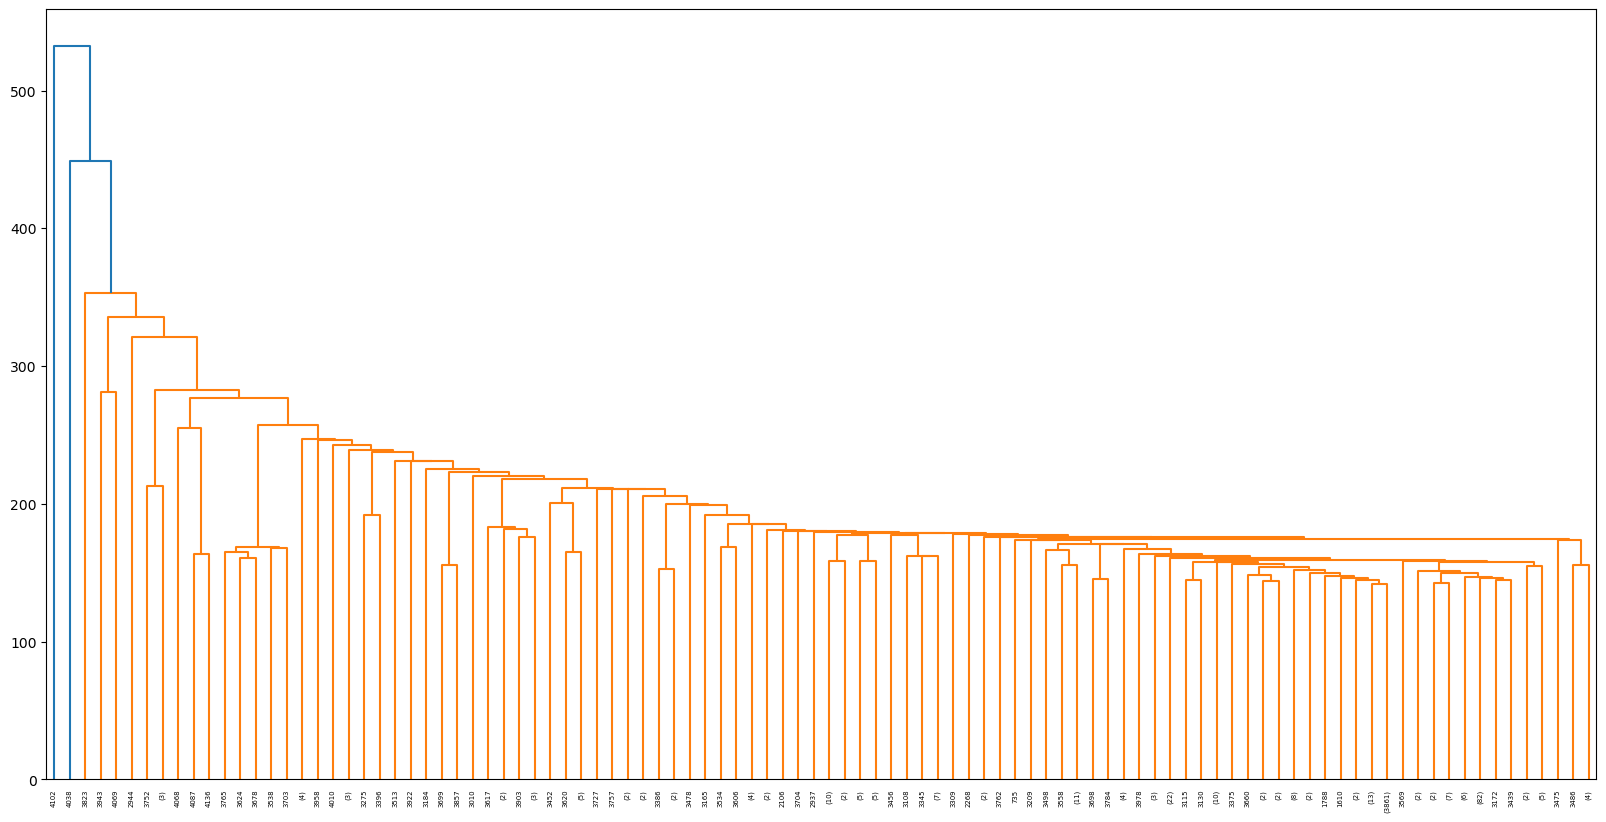

In [115]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=100) #truncate it

In [132]:
#theoretical max distance
np.sqrt(len(df_ds.columns))

3.3166247903554

In [143]:
scaled_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143,1.0,0.0,0.0
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429,0.0,0.0,1.0
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714,0.0,0.0,1.0
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429,1.0,0.0,0.0


In [145]:
scaled_df['Whole weight'].idxmax()

891

In [147]:
scaled_df['Whole weight'].idxmin()

236

In [153]:
a = scaled_df.iloc[891]
b = scaled_df.iloc[236]
dist = np.linalg.norm(a-b)
dist #euclidian

2.5816579345780046

In [260]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=1.9)

In [262]:
cluster_labels = model.fit_predict(scaled_df)

In [264]:
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [266]:
linkage_matrix = hierarchy.linkage(model.children_)

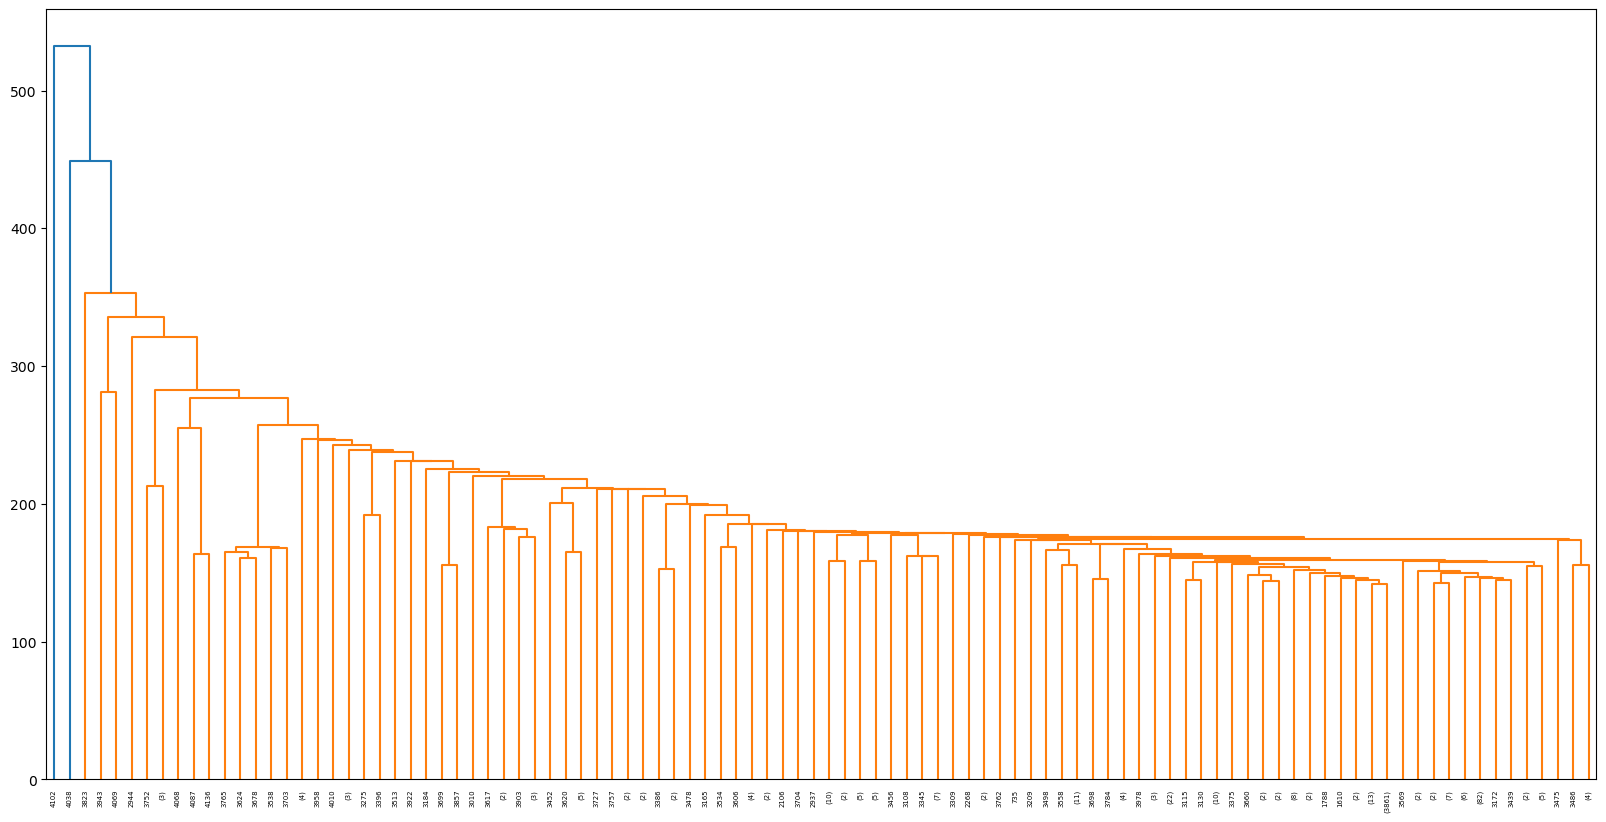

In [268]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=100)